In [206]:
%load_ext autoreload
%autoreload 2

# make sure your run the cell above before running this
import Decision_tree_helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
import pandas as pd
df = pd.read_csv("final_no_alt_senate_tweets.csv")
df

,Unnamed: 0,name,screen_name,twitter_full_name,last_name,num_tweets_analyzed,user_id,following_count,num_tweets_user_posted,followers_count,...,avg_likes,avg_neg_sentiment,avg_neutral_sentiment,avg_pos_sentiment,avg_compound_sentiment,ideology,extremism,pos_approval,neutral_approval,neg_approval
0,0,Amy Klobuchar,amyklobuchar,Amy Klobuchar,Klobuchar,145,3.353797e+07,133676,14815,1885511,...,8331.634483,0.071883,0.786117,0.142034,0.258987,0.138044,1.384999,56,14,31
1,3,Bernie Sanders,BernieSanders,Bernie Sanders,Sanders,166,2.167766e+08,1472,20509,15505513,...,30416.548193,0.090801,0.776199,0.132970,0.138334,0.016945,1.794833,65,6,29
2,4,Bill Cassidy,BillCassidy,"Bill Cassidy, M.D.",Cassidy,58,5.567743e+07,1278,7231,46862,...,24.741379,0.069276,0.769638,0.161103,0.358007,0.762907,0.729715,47,27,26
3,6,Brian Schatz,brianschatz,Brian Schatz,Schatz,126,4.774707e+07,3086,19537,389669,...,5229.896825,0.081651,0.752857,0.149619,0.106227,0.223527,1.095699,48,23,29
4,7,Chris Murphy,ChrisMurphyCT,Chris Murphy,Murphy,119,1.500790e+08,233,26896,1076148,...,4576.865546,0.091504,0.781034,0.119101,0.000751,0.201255,1.171074,47,19,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,113,Ted Cruz,tedcruz,Ted Cruz,Cruz,83,2.302269e+07,5377,35823,4754971,...,5676.481928,0.085181,0.764120,0.126578,0.110524,0.913741,1.240179,49,17,34
77,115,Tim Kaine,timkaine,Tim Kaine,Kaine,29,1.728588e+08,772,11451,1000843,...,1692.862069,0.107241,0.753621,0.139034,0.027759,0.255174,0.988598,45,22,34
78,117,Tim Scott,SenatorTimScott,Tim Scott,Scott,49,2.175432e+08,3777,10675,613648,...,939.224490,0.047122,0.778082,0.174837,0.386318,0.823567,0.935006,50,26,24
79,119,Tom Cotton,SenTomCotton,Tom Cotton,Cotton,61,9.686504e+08,359,11037,465059,...,2297.081967,0.084377,0.775016,0.140705,0.171521,0.904927,1.210349,48,21,31


In [208]:
df.describe()

,Unnamed: 0,num_tweets_analyzed,user_id,following_count,num_tweets_user_posted,followers_count,num_posts_user_liked,avg_retweets,avg_likes,avg_neg_sentiment,avg_neutral_sentiment,avg_pos_sentiment,avg_compound_sentiment,ideology,extremism,pos_approval,neutral_approval,neg_approval
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,8.100000e+01,81.00000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,65.358025,76.197531,5.728958e+16,4932.716049,12775.185185,8.971544e+05,1078.17284,609.859651,3134.577253,0.069040,0.771337,0.152742,0.267465,0.521443,0.928861,46.283951,21.629630,32.246914
std,32.338177,42.306447,2.261606e+17,17759.603483,9821.485961,2.064239e+06,1579.75475,2274.541313,14016.395852,0.022812,0.038621,0.035010,0.160835,0.299906,0.405381,5.906002,6.083676,5.302195
min,0.000000,6.000000,7.429102e+06,48.000000,2112.000000,2.238600e+04,18.00000,6.879310,23.360000,0.024070,0.602833,0.101211,-0.107907,0.016945,0.026806,34.000000,6.000000,21.000000
25%,43.000000,44.000000,4.774707e+07,589.000000,7190.000000,1.246250e+05,219.00000,27.419643,104.422222,0.052937,0.756240,0.128724,0.141120,0.228285,0.659909,42.000000,18.000000,29.000000
50%,68.000000,63.000000,2.259218e+08,1025.000000,10222.000000,2.597310e+05,651.00000,91.288889,337.813333,0.069257,0.777187,0.144934,0.270225,0.555209,0.978418,47.000000,22.000000,32.000000
75%,90.000000,111.000000,9.465493e+08,2404.000000,15832.000000,5.650730e+05,1210.00000,403.886792,1692.862069,0.084956,0.793303,0.173667,0.396257,0.823567,1.207308,49.000000,26.000000,36.000000
max,121.000000,186.000000,1.080870e+18,133676.000000,67098.000000,1.550551e+07,10077.00000,19774.166667,123040.000000,0.129000,0.826324,0.329775,0.544126,1.000000,1.794833,65.000000,34.000000,52.000000


In [209]:
bin_df = df.copy()
bin_df["ideology"] = Decision_tree_helper.binned(df["ideology"] * 100, 25)
bin_df["extremism"] = Decision_tree_helper.binned(df["extremism"] * 10, 6)
bin_df["pos_approval"] = Decision_tree_helper.binned(df["pos_approval"], 8)
bin_df["neutral_approval"] = Decision_tree_helper.binned(df["neutral_approval"], 8)
bin_df["neg_approval"] = Decision_tree_helper.binned(df["neg_approval"], 8)
bin_df["pol_leaning"] =  df["ideology"].map(lambda i: "left" if i < 0.5 else "right")
bin_df["is_extreme"] =  (df["ideology"] < 0.20) | (df["ideology"] > 0.80)
bin_df["extreme_left"] =  df["ideology"] < 0.20
bin_df["extreme_right"] =  df["ideology"] > 0.80
bin_df["less_pos_approval_than_avg"] = df["pos_approval"] < df["pos_approval"].mean()
bin_df["less_neutral_approval_than_avg"] = df["neutral_approval"] < df["neutral_approval"].mean()
bin_df["less_neg_approval_than_avg"] = df["neg_approval"] < df["neg_approval"].mean()
bin_df

,Unnamed: 0,name,screen_name,twitter_full_name,last_name,num_tweets_analyzed,user_id,following_count,num_tweets_user_posted,followers_count,...,pos_approval,neutral_approval,neg_approval,pol_leaning,is_extreme,extreme_left,extreme_right,less_pos_approval_than_avg,less_neutral_approval_than_avg,less_neg_approval_than_avg
0,0,Amy Klobuchar,amyklobuchar,Amy Klobuchar,Klobuchar,145,3.353797e+07,133676,14815,1885511,...,56,8,24,left,True,True,False,False,True,True
1,3,Bernie Sanders,BernieSanders,Bernie Sanders,Sanders,166,2.167766e+08,1472,20509,15505513,...,64,0,24,left,True,True,False,False,True,True
2,4,Bill Cassidy,BillCassidy,"Bill Cassidy, M.D.",Cassidy,58,5.567743e+07,1278,7231,46862,...,40,24,24,right,False,False,False,False,False,True
3,6,Brian Schatz,brianschatz,Brian Schatz,Schatz,126,4.774707e+07,3086,19537,389669,...,48,16,24,left,False,False,False,False,False,True
4,7,Chris Murphy,ChrisMurphyCT,Chris Murphy,Murphy,119,1.500790e+08,233,26896,1076148,...,40,16,32,left,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,113,Ted Cruz,tedcruz,Ted Cruz,Cruz,83,2.302269e+07,5377,35823,4754971,...,48,16,32,right,True,False,True,False,True,False
77,115,Tim Kaine,timkaine,Tim Kaine,Kaine,29,1.728588e+08,772,11451,1000843,...,40,16,32,left,False,False,False,True,False,False
78,117,Tim Scott,SenatorTimScott,Tim Scott,Scott,49,2.175432e+08,3777,10675,613648,...,48,24,24,right,True,False,True,False,False,True
79,119,Tom Cotton,SenTomCotton,Tom Cotton,Cotton,61,9.686504e+08,359,11037,465059,...,48,16,24,right,True,False,True,False,True,True


In [210]:
xCols = ["following_count", "num_tweets_user_posted", "followers_count", "avg_retweets", "avg_likes", "avg_compound_sentiment"]
yCol = "ideology"

X = bin_df[xCols]
y_ideology = bin_df[yCol]

display(X)
display(y_ideology)

,following_count,num_tweets_user_posted,followers_count,avg_retweets,avg_likes,avg_compound_sentiment
0,133676,14815,1885511,1329.275862,8331.634483,0.258987
1,1472,20509,15505513,5415.915663,30416.548193,0.138334
2,1278,7231,46862,6.879310,24.741379,0.358007
3,3086,19537,389669,1086.642857,5229.896825,0.106227
4,233,26896,1076148,1316.823529,4576.865546,0.000751
...,...,...,...,...,...,...
76,5377,35823,4754971,1388.650602,5676.481928,0.110524
77,772,11451,1000843,243.448276,1692.862069,0.027759
78,3777,10675,613648,179.163265,939.224490,0.386318
79,359,11037,465059,779.245902,2297.081967,0.171521


0      0
1      0
2     75
3      0
4      0
      ..
76    75
77    25
78    75
79    75
80    75
Name: ideology, Length: 81, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_ideology, test_size=0.3, random_state = 0)

In [212]:
Decision_tree_helper.select_split2(X_train, y_train)

('avg_compound_sentiment<0.40', 0.15698445772957084)

In [213]:
tree = Decision_tree_helper.make_tree2(X_train,y_train,min_split_count=5)
Decision_tree_helper.print_tree(tree)

{
    "avg_compound_sentiment<0.40": {
        "False": {
            "followers_count<150260.00": {
                "False": 50,
                "True": {
                    "num_tweets_user_posted<4292.00": {
                        "False": 75,
                        "True": 50
                    }
                }
            }
        },
        "True": {
            "num_tweets_user_posted<17773.50": {
                "False": {
                    "followers_count<423607.00": {
                        "False": {
                            "following_count<13332.50": {
                                "False": 0,
                                "True": 0
                            }
                        },
                        "True": 75
                    }
                },
                "True": {
                    "avg_retweets<460.40": {
                        "False": {
                            "avg_likes<3352.70": {
                                "Fals

In [214]:
rules = Decision_tree_helper.generate_rules(tree)
rules[:5]

[[('avg_compound_sentiment<0.40', 'True'),
  ('num_tweets_user_posted<17773.50', 'True'),
  ('avg_retweets<460.40', 'True'),
  ('following_count<751.50', 'False'),
  ('avg_likes<1254.57', 'True'),
  ('followers_count<557654.00', 'True'),
  25],
 [('avg_compound_sentiment<0.40', 'True'),
  ('num_tweets_user_posted<17773.50', 'True'),
  ('avg_retweets<460.40', 'True'),
  ('following_count<751.50', 'False'),
  ('avg_likes<1254.57', 'True'),
  ('followers_count<557654.00', 'False'),
  75],
 [('avg_compound_sentiment<0.40', 'True'),
  ('num_tweets_user_posted<17773.50', 'True'),
  ('avg_retweets<460.40', 'True'),
  ('following_count<751.50', 'False'),
  ('avg_likes<1254.57', 'False'),
  0],
 [('avg_compound_sentiment<0.40', 'True'),
  ('num_tweets_user_posted<17773.50', 'True'),
  ('avg_retweets<460.40', 'True'),
  ('following_count<751.50', 'True'),
  ('avg_likes<122.26', 'False'),
  0],
 [('avg_compound_sentiment<0.40', 'True'),
  ('num_tweets_user_posted<17773.50', 'True'),
  ('avg_retwe

In [215]:
import numpy as np

default = y_train.mode()[0]
y_guesses = X_test.apply(lambda x: Decision_tree_helper.make_prediction(rules,x,default),axis=1)
accuracy = np.count_nonzero(y_guesses == y_test) / len(y_test)
accuracy

0.36

In [216]:
baseline = np.count_nonzero(default == y_test) / len(y_test)
baseline

0.32

In [217]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
y_guesses_skl = clf.predict(X_test)
accuracy_skl = np.count_nonzero(y_guesses == y_test) / len(y_test)
accuracy

0.36

In [218]:
import warnings
warnings.filterwarnings('ignore')

In [219]:
from sklearn import tree as skl_tree

xCols = ["following_count", "num_tweets_user_posted", "followers_count", "avg_retweets", "avg_likes", "avg_compound_sentiment"]
yCols = ["ideology", "extremism", "pol_leaning", "is_extreme", "extreme_left", "extreme_right", "pos_approval", "neutral_approval", "neg_approval"]
X = bin_df[xCols]
      
for yCol in yCols:
    print(f"Analysing {yCol}...")
    y = bin_df[yCol]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
    col, gr = Decision_tree_helper.select_split2(X_train, y_train)
    print(f"The first branch was {col}, which had a gain ratio of {gr}")
    tree = Decision_tree_helper.make_tree2(X_train,y_train,min_split_count=5)
    rules = Decision_tree_helper.generate_rules(tree)
    default = y_train.mode()[0]
    y_guesses = X_test.apply(lambda x: Decision_tree_helper.make_prediction(rules,x,default),axis=1)
    accuracy = np.count_nonzero(y_guesses == y_test) / len(y_test)
    baseline = np.count_nonzero(default == y_test) / len(y_test)
    clf = skl_tree.DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
    y_guesses_skl = clf.predict(X_test)
    accuracy_skl = np.count_nonzero(y_guesses_skl == y_test) / len(y_test)
    print(f"This model ended up having an accuracy of {accuracy}, whereas the Scikit Learn model had an accuracy of {accuracy_skl}. The baseline was {baseline}\n")

Analysing ideology...
The first branch was avg_compound_sentiment<0.40, which had a gain ratio of 0.15698445772957084
This model ended up having an accuracy of 0.36, whereas the Scikit Learn model had an accuracy of 0.28. The baseline was 0.32

Analysing extremism...
The first branch was num_tweets_user_posted<6923.50, which had a gain ratio of 0.105456372213472
This model ended up having an accuracy of 0.44, whereas the Scikit Learn model had an accuracy of 0.44. The baseline was 0.44

Analysing pol_leaning...
The first branch was avg_compound_sentiment<0.40, which had a gain ratio of 0.3037776108837696
This model ended up having an accuracy of 0.72, whereas the Scikit Learn model had an accuracy of 0.44. The baseline was 0.48

Analysing is_extreme...
The first branch was following_count<222.50, which had a gain ratio of 0.06560110083671669
This model ended up having an accuracy of 0.48, whereas the Scikit Learn model had an accuracy of 0.56. The baseline was 0.48

Analysing extreme_l

<AxesSubplot:xlabel='ideology'>

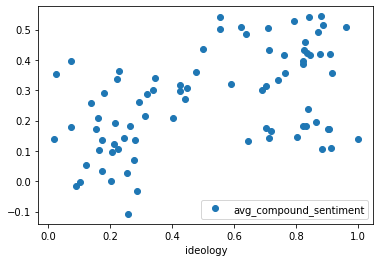

In [222]:
df.plot(x="ideology", y="avg_compound_sentiment", style="o")